### LINEAR REGRESSION

##### THE SYNTAX

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
### create an instance of the class
LR = LinearRegression()

In [ ]:
### Fit the instance on the data and then predict the expected value
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

#### CASE EXAMPLE:

In [3]:
import pandas as pd

file_path = "/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/bostonhousing.xls"
df = pd.read_csv(file_path, delim_whitespace=True)  # whitespace-separated format

df.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [4]:
import pandas as pd

# File path (already confirmed)
file_path = "/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/bostonhousing.xls"

# desired column headers
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
           "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

# Read and add headers
df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)

# Save as a new CSV with headers
new_file_path = "/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/bostonhousing_with_headers.csv"
df.to_csv(new_file_path, index=False)

# Show first rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<Axes: >

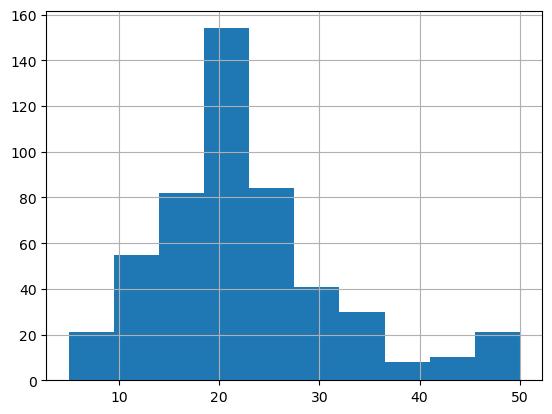

In [6]:
df.MEDV.hist()

The histogram does not look normal due to its right tail.

We need to conduct a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
* This test outputs a p-value. The higher this p-value is the closer the distribution is to normal.
* Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [8]:
# D'Agostino K^2 Test for Normality
from scipy.stats.mstats import normaltest

In [10]:
normaltest(df.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

RESULT: p-value is extremely low. Our y variable which we have been dealing with this whole time was not normally distributed!

## Transformations to make target variable more normally distributed for Regression

#### LOG TRANSFORMATION

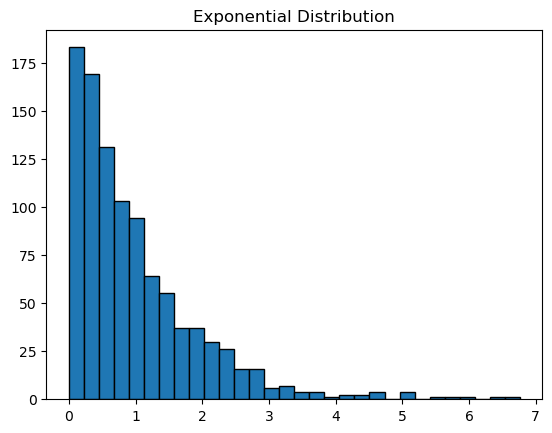

In [19]:
# The log transformation can transform data 
# that is significantly skewed right to be more normally distributed

def plot_exponential_data(size=1000, scale=1.0):
    # Generate exponential data
    data = np.random.exponential(scale=scale, size=size)
    
    # Plot histogram
    plt.hist(data, bins=30, edgecolor='black')
    plt.title('Exponential Distribution')
    plt.show()
    
    # Return the data
    return pd.Series(data)

# Now this will work
data = plot_exponential_data()

(array([  1.,   1.,   8.,  14.,  42.,  72., 179., 321., 304.,  58.]),
 array([-7.47125333, -6.53300021, -5.5947471 , -4.65649398, -3.71824087,
        -2.77998775, -1.84173464, -0.90348152,  0.03477159,  0.97302471,
         1.91127782]),
 <BarContainer object of 10 artists>)

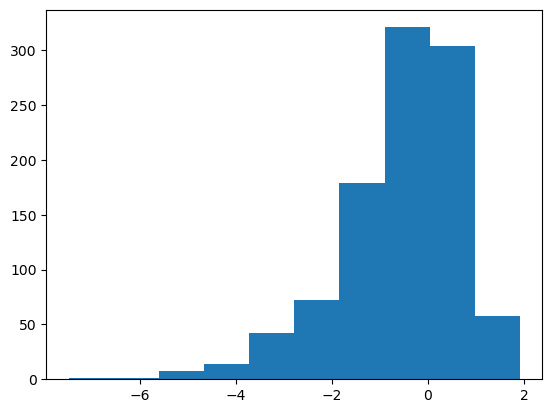

In [20]:
plt.hist(np.log(data))

In [22]:
# transform bostonhousing data
log_mdv = np.log(df.MEDV)

<Axes: >

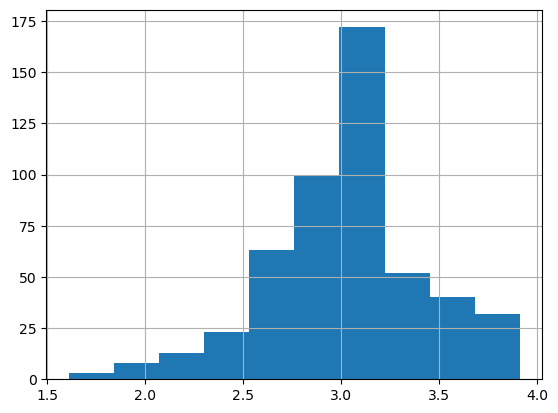

In [25]:
log_mdv.hist()

In [26]:
normaltest(log_mdv)

NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)

RESULT: The output is closer to normal distribution, but still not completely normal.

#### SQUARE ROOT TRANSFORMATION

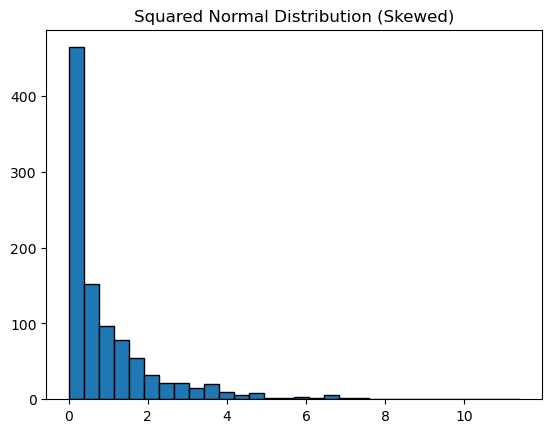

In [34]:
# The square root transformation is another transformation 
# that can transform non-normally distributed data into normally distributed data:

def plot_square_normal_data(size=1000, mean=0, std=1):
    # Generate normal data
    data = np.random.normal(mean, std, size)
    
    # Square the values to skew the distribution
    squared_data = data**2
    
    # Plot histogram
    plt.hist(squared_data, bins=30, edgecolor='black')
    plt.title('Squared Normal Distribution (Skewed)')
    plt.show()
    
    return pd.Series(squared_data)

# Example usage
data = plot_square_normal_data()

(array([234., 236., 182., 120., 110.,  54.,  35.,  18.,   8.,   3.]),
 array([1.78103548e-04, 3.16326206e-01, 6.32474309e-01, 9.48622412e-01,
        1.26477051e+00, 1.58091862e+00, 1.89706672e+00, 2.21321482e+00,
        2.52936293e+00, 2.84551103e+00, 3.16165913e+00]),
 <BarContainer object of 10 artists>)

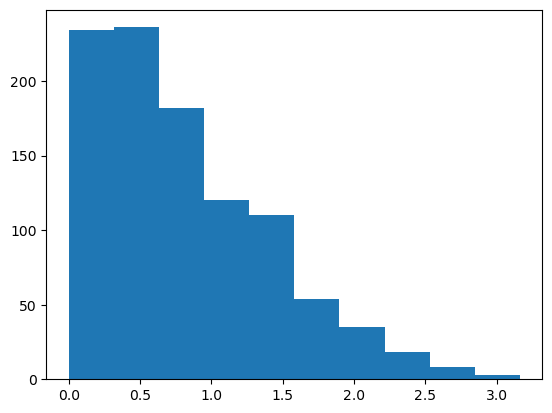

In [31]:
plt.hist(np.sqrt(data))

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <BarContainer object of 10 artists>)

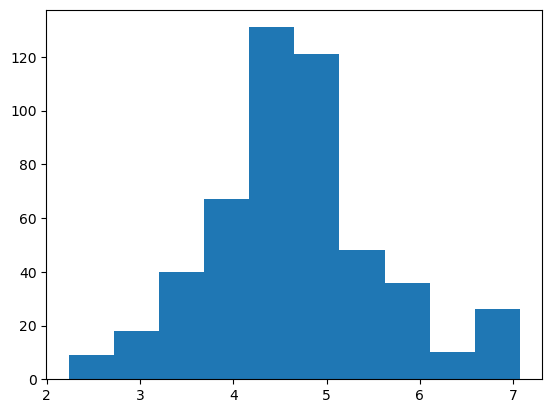

In [32]:
sqrt_medv = np.sqrt(df.MEDV)
plt.hist(sqrt_medv)

In [33]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

#### BOX COX TRANSFORMATION

In [35]:
# The box cox transformation is a parametrized transformation 
# that tries to get distributions "as close to a normal distribution as possible".
# You can think of as a generalization of the square root function: 
# the square root function uses the exponent of 0.5, 
# but box cox lets its exponent vary so it can find the best one.

from scipy.stats import boxcox



In [36]:
bc_results = boxcox(df.MEDV)
boxcox_medv = bc_results[0]
lam = bc_results[1]

In [37]:
lam

0.2166209012915364

<Axes: >

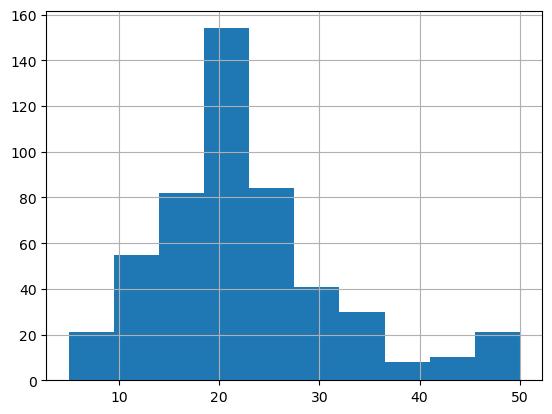

In [38]:
df['MEDV'].hist()

(array([  4.,  15.,  17.,  49.,  68., 151.,  99.,  50.,  23.,  30.]),
 array([1.92564954, 2.3487372 , 2.77182485, 3.1949125 , 3.61800016,
        4.04108781, 4.46417546, 4.88726311, 5.31035077, 5.73343842,
        6.15652607]),
 <BarContainer object of 10 artists>)

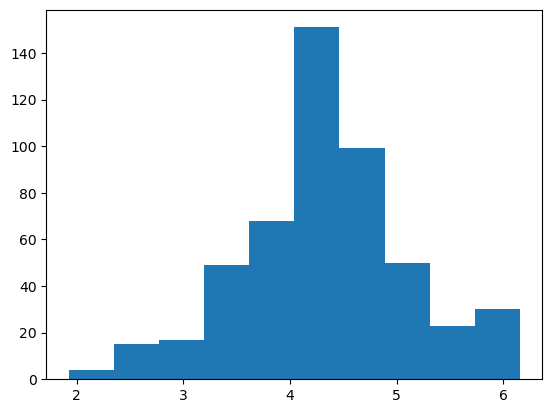

In [39]:
plt.hist(boxcox_medv)

In [40]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

RESULT: the box cox results in a graph which is significantly more normally distributed (according to p value) than the other two distributions.This can be even above 0.05.

#### TESTING REGRESSION

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [42]:
lr = LinearRegression()

In [44]:
# Define and load the predictor (X) and Target(y) variables
y_col = "MEDV"

X = df.drop(y_col, axis = 1)
y = df[y_col]

In [45]:
# Create Polynomial Features
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

Split the data into Training and Test Sets

The split ratio here is 0.7 and 0.3 which means we will assign 70% data for training and 30% data for testing

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=72018)

In [47]:
# Normalize the training data using StandardScaler on X_train. Use fit_transform() function
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [49]:
# box cox transformation on the target variable

bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [50]:
# 1. Fit regression
# 2. Transform testing data
# 3. Predict on testing data

y_train_bc.shape

(354,)

In [51]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

Apply inverse transformations to be able to use these in a Regression context

Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:

In [52]:
from scipy.special import inv_boxcox

In [53]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [54]:
df["MEDV"].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [57]:
# Apply the appropriate inverse transformation to y_pred_bc.
# Calculate the $R^2$ using the result of this inverse transformation and y_test

y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_test,y_pred_tran)

0.8886829586200806

In [58]:
# Determine the R^2 of a LinearRegression without the box cox transformation.

lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(y_test,lr_pred)

0.8687609133106011